In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# EDA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
Outcome = {0: -1,1: 1}
df.Outcome = [Outcome[item] for item in df.Outcome]
df1 = df.copy()
Y = df1['Outcome'].to_numpy().reshape(-1,1)
df1 = df1.drop(columns=['Outcome'])
X = df1.to_numpy()

In [ ]:
plt.figure(figsize=(10,10))
column_stats = df.describe()[1:].T
heat_map = column_stats.style.background_gradient(cmap='Reds')
display(heat_map)

,mean,std,min,25%,50%,75%,max
Pregnancies,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,-0.302083,0.953903,-1.000000,-1.000000,-1.000000,1.000000,1.000000


<Figure size 720x720 with 0 Axes>

The heatmap above shows us the various statistics of the features considered. These statistics may be useful for inferences depending on how we plan on utilizing these features.

In [ ]:
corr_matrix = df.corr()
corr_matrix_heatmap = corr_matrix.style.background_gradient(cmap='Reds')
display(corr_matrix_heatmap)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


The above heatmap shows the correlations between the features considered and the outcome, which is our label. We can observe that Glucose and BMI have the highest correlation with our outcome label. Further, we can observe that Insulin and BMI show a somewhat high correlation with skin thickness.

Text(0.5, 1.0, 'Correlation between outcome and different features')

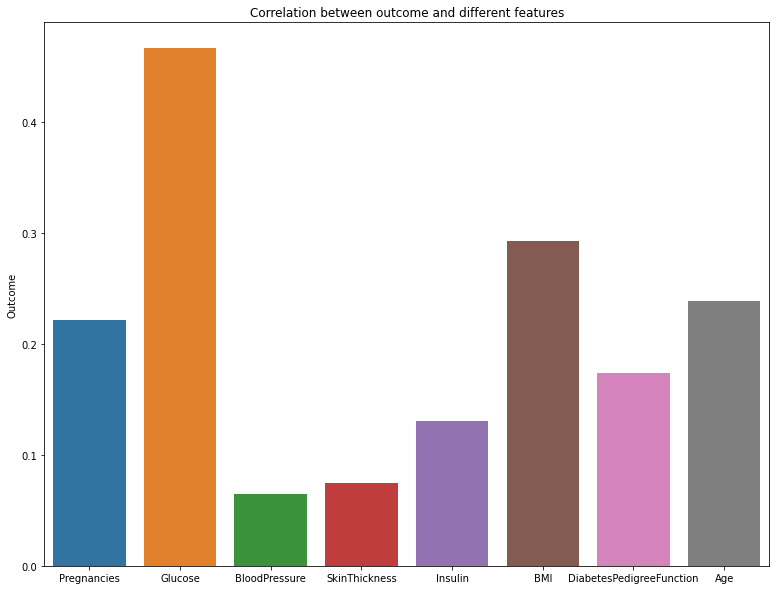

In [ ]:
plt.figure(figsize=(13,10))
corr_matrix_indices = corr_matrix.index[:-1]
outcome_corr_barplot = sns.barplot(x=corr_matrix_indices, y= corr_matrix['Outcome'][:-1])
plt.title("Correlation between outcome and different features")

The above bar graph helps us visualize the extent of correlation of the features with the outcome label. We can clearly verify the high correlation of glucose with diabetes here.

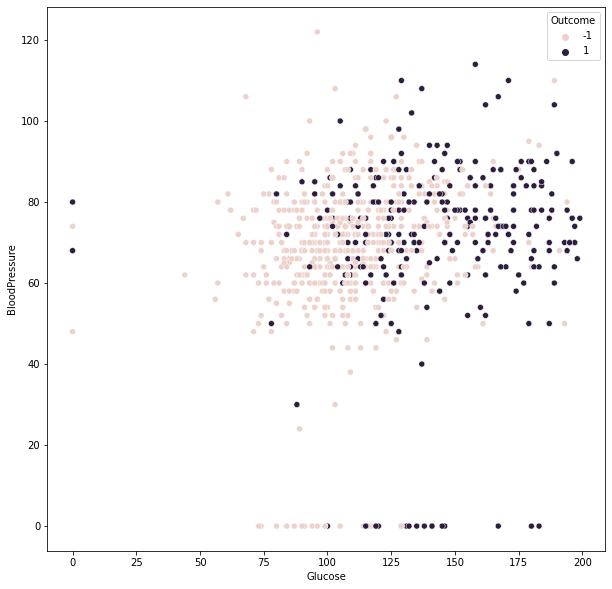

In [ ]:
plt.figure(figsize=(10,10))
glucose_bp_scatterplot = sns.scatterplot(data=df, x="Glucose", y="BloodPressure", hue = "Outcome")
display(glucose_bp_scatterplot)

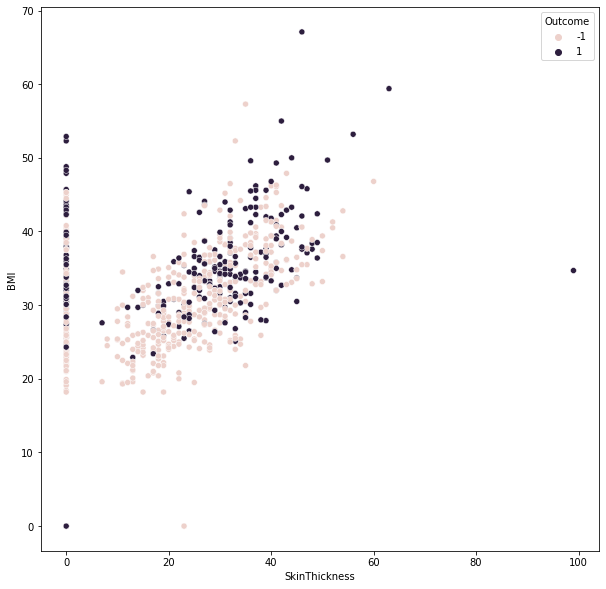

In [ ]:
plt.figure(figsize=(10,10))
glucose_skinthickness_bmi = sns.scatterplot(data=df, x="SkinThickness", y="BMI", hue = "Outcome")
display(glucose_skinthickness_bmi)

Text(0.5, 1.0, 'Age distribution of positive diabetes patients')

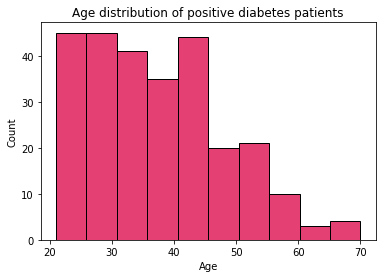

In [ ]:
hist_pos = sns.histplot(df[df["Outcome"]==1]["Age"], color="#dd0044")
plt.title("Age distribution of positive diabetes patients")

Text(0.5, 1.0, 'Age distribution of negative diabetes patients')

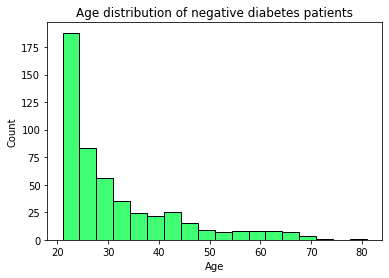

In [ ]:
hist_neg = sns.histplot(df[df["Outcome"]==-1]["Age"], color="#00ff44")
plt.title("Age distribution of negative diabetes patients")

From the above two age distribution histograms, we can see that the age distribution of both, positive and negative diabetic patients, are concentrated on the younger ages. However, the positive patients are somewhat more distributed than the negative patients, with the negative patients being largely very young patients mostly in the 20-30 years range.

In [ ]:
n_cases = len(df)
n_positive = len(df.loc[df["Outcome"]==1])
percent_positive = round((n_positive/n_cases)*100,3)
percent_negative = 100-percent_positive
print(f"Percentage of people who were positive for diabetes = {percent_positive}")
print(f"Percentage of people who were negative for diabetes = {percent_negative}")

Percentage of people who were positive for diabetes = 34.896
Percentage of people who were negative for diabetes = 65.104


# Train-Test Split

In [ ]:
def train_test_split(dataset, train_percent):
  dataset_length = len(dataset)
  train_length = int((train_percent*dataset_length)/100)
  indices = range(0, dataset_length)
  train_indices = random.sample(indices, train_length)
  test_indices = np.delete(indices, train_indices)
  df_train = df.iloc[train_indices]
  df_test = df.iloc[test_indices]
  y_train = df_train['Outcome'].to_numpy().reshape(-1,1)
  y_test = df_test['Outcome'].to_numpy().reshape(-1,1)
  df_train = df_train.drop(columns=['Outcome'])
  x_train = df_train.to_numpy()
  df_test = df_test.drop(columns=['Outcome'])
  x_test = df_test.to_numpy()

  return x_train, y_train, x_test, y_test

# SVM

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
Outcome = {0: -1,1: 1}
df.Outcome = [Outcome[item] for item in df.Outcome]
df1 = df.copy()
Y = df1['Outcome'].to_numpy().reshape(-1,1)
df1 = df1.drop(columns=['Outcome'])
X = df1.to_numpy()

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(df,80)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
def euclidDistance(P1,P2):
    return np.linalg.norm(P1-P2,2)

In [ ]:
def allDistances(X1, X2):
    D = np.zeros((X1.shape[0], X2.shape[0]))
    for id_x1 in range(len(X1)):
        for id_x2 in range(len(X2)):
            D[id_x1,id_x2] = euclidDistance(X1[id_x1,:],X2[id_x2,:])
    return D

SVM Classifier

In [ ]:
def svmPredict(Xtr, Ytr, Xte, reg_parm = 0.1, epochs = 10000):
    
    n_train, d_train = np.shape(Xtr)
    
    if any(np.abs(Ytr) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1
    
    
    
    w = np.zeros(d_train)
    
    for epoch in range(1, epochs):
        learning_rate = 1/epoch        # variable learning rate
        for i, x in enumerate(Xtr):
            if (Ytr[i] * np.dot(Xtr[i], w)) < 1:
                w = (1 - learning_rate)*w + (learning_rate)*reg_parm*Ytr[i]*Xtr[i]
            else:
                w = (1 - learning_rate)*w
    
    Ypred = np.dot(Xte, w)
    
    return Ypred, w

Classification Error Claculation for SVM

In [ ]:
def calcErrorSVM(Ypred, Ytrue):
    count = 0
    for i in range(len(Ytrue)):
        if Ypred[i]*Ytrue[i] <1 :
            count +=1
    return count/len(Ytrue)

SVM Train-Test Error Analysis

In [ ]:
def svmTrainTestAnalysis(Xtr, Ytr, Xte, Yte, reg_params):
    
    train_err = np.zeros(np.shape(reg_params))
    test_err = np.zeros(np.shape(reg_params))
    
    for i in range(len(reg_params)):
        Ypredt, w_train = svmPredict(Xtr, Ytr, Xtr, reg_params[i])
        train_err[i] = calcErrorSVM(Ypredt, Ytr)
        
        Ypredtr, w_pred = svmPredict(Xtr, Ytr, Xte, reg_params[i])
        test_err[i] = calcErrorSVM(Ypredtr, Yte)

    return train_err, test_err

K-Fold Cross Validation for SVM

In [ ]:
def kFoldCrossValidationSVM(X,Y, num_of_folds, reg_param_list):
    
    if num_of_folds <= 0 and num_of_folds >= 100 and isinstance(num_of_folds, int):
        print("select an integer in between 1 and 100")
        return -1
        
    size_of_input = X.shape[0]   
    size_of_validation = int(np.ceil(size_of_input/num_of_folds))
    
    num_reg_param = len(reg_param_list)
    reg_param_list = np.array(reg_param_list)
    
    
    T_mean, T_sd, V_mean, V_sd = np.zeros(num_reg_param), np.zeros(num_reg_param), np.zeros(num_reg_param), np.zeros(num_reg_param)
        
    random_index = np.random.choice(size_of_input, size=size_of_input, replace=False)
    
    for reg_index, reg_param in enumerate(reg_param_list):
        first = 0
        for fold in range(num_of_folds):
            
            flags = np.zeros(size_of_input)
            flags[first:first+size_of_validation] = 1
            
            X_training, Y_training = X[flags == 0], Y[flags == 0]
            X_validation, Y_validation = X[flags == 1], Y[flags == 1]
            
            # training Error calculation
            Y_train_predict, w = svmPredict(X_training, Y_training, X_training, reg_param)
            training_error = calcErrorSVM(Y_train_predict, Y_training)
            
            T_mean[reg_index] += training_error
            T_sd[reg_index] += training_error**2
            
            # validation errorcalculation
            Y_validation_predict, w = svmPredict(X_training, Y_training, X_validation, reg_param)
            validation_error = calcErrorSVM(Y_validation_predict, Y_validation)
            
            V_mean[reg_index] += validation_error
            V_sd[reg_index] += validation_error**2
            
            first += size_of_validation
            
    T_mean = T_mean / num_of_folds 
    T_sd = T_sd / num_of_folds - T_mean**2
    
    V_mean = V_mean / num_of_folds 
    V_sd = V_sd - V_mean**2
    
    best_reg_param_index = np.argmin(V_mean)
    best_reg_param = reg_param_list[best_reg_param_index]
    
    return best_reg_param, T_mean, T_sd, V_mean, V_sd

Calling the model to get an overview for a fixed Regularization Parameter

[ 0.31548939  0.87408439 -0.21014592 -0.04147147 -0.01919309  0.38246148
  0.31167634  0.21412022]
0.6168831168831169


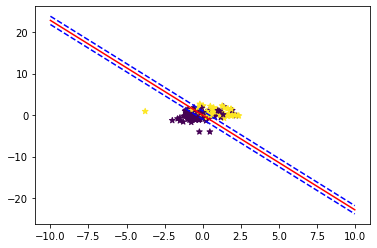

In [ ]:
reg_param = 40
Y_pred, w = svmPredict(x_train, y_train, x_test, reg_param) 
train_err1 = calcErrorSVM(Y_pred, y_test)
print(w)
print(train_err1)

# Visualization of the model

plt.scatter(np.array(x_test[:,1]), np.array(x_test[:,5]), marker='*',c=y_test)

# Create the hyperplane

a = -w[1] / w[5]
xx = np.linspace(-10,10)
yy = a * xx 

# Plot the hyperplane
plt.plot(xx, yy, color='red')

# Plot support vectors 
plt.plot(xx, (yy+1), linestyle='--', color='blue')
plt.plot(xx, (yy-1), linestyle='--', color='blue')

plt.show();

Checking the Training and Validation error for Order of the Regularization Parameter

In [ ]:
import timeit

reg_params = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
train_errors = np.zeros(len(reg_params))
validation_errors = np.zeros(len(reg_params))

start_time = timeit.default_timer()

train_errors, validation_errors = svmTrainTestAnalysis(x_train, y_train, x_test, y_test, reg_params)
    
end_time = timeit.default_timer()

print('Time taken to complete process:', end_time - start_time)

Time taken to complete process: 1472.216095925


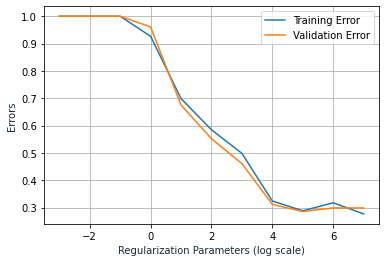

In [ ]:
plt.plot(np.log10(np.array(reg_params)), np.array(train_errors), label='Training Error')
plt.plot(np.log10(np.array(reg_params)), np.array(validation_errors), label='Validation Error')
plt.xlabel('Regularization Parameters (log scale)', color='#1C2833')
plt.ylabel('Errors', color='#1C2833')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# KNN

In [ ]:
def kNNClassify(Xtr, Ytr, k, Xte, Te=1):

    n_train = Xtr.shape[0]
    n_test = Xte.shape[0]

    if any(np.abs(Ytr) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1

    if k > n_train:
        print("k is greater than the number of points, setting k=n_train")
        k = n_train

    Ypred = np.zeros(n_test)

    dist = allDistances(Xte, Xtr)

    for idx in range(n_test):
        if(Te==1): # test set
            neigh_indexes = np.argsort(dist[idx, :])[:k]
        else:
            neigh_indexes = np.argsort(dist[idx, :])[1:k+1]
            
        avg_neigh = np.mean(Ytr[neigh_indexes])
        Ypred[idx] = np.sign(avg_neigh)

    return Ypred

Classification Error Calculation on KNN

In [ ]:
def knncalcError(Ypred, Ytrue):
    return (np.count_nonzero(Ypred!=Ytrue))/len(Ytrue)

KNN Train-Test Error Analysis

In [ ]:
def knntrainTestAnalysis(Ks, Xtr, Ytr, Xte, Yte):

    train_err = np.zeros(np.shape(Ks))
    test_err = np.zeros(np.shape(Ks))

    kpos = 0
    for kpos in range(len(Ks)):
        Ypredte = kNNClassify(Xtr, Ytr, Ks[kpos], Xte)
        test_err[kpos] = knncalcError(Ypredte, Yte)
        
        Ypredtr = kNNClassify(Xtr, Ytr, Ks[kpos], Xtr,Te=0)
        train_err[kpos] = knncalcError(Ypredtr, Ytr)

    return train_err, test_err

K-Fold Cross Validation for KNN

In [ ]:
def KFoldCVkNN(Xtr, Ytr, KF, k_list):

    if KF <= 0:
        print("Please supply a positive number of repetitions")
        return -1

    # Ensures that k_list is a numpy array
    k_list = np.array(k_list)
    num_k = k_list.size

    n_tot = Xtr.shape[0]
    n_val = int(np.ceil(n_tot/KF))

    Tm = np.zeros(num_k)
    Ts = np.zeros(num_k)
    Vm = np.zeros(num_k)
    Vs = np.zeros(num_k)

    # Random permutation of training data
    rand_idx = np.random.choice(n_tot, size=n_tot, replace=False)
    
    
    for kdx, k in enumerate(k_list):
        first = 0
        for fold in range(KF):
           
            flags = np.zeros(Xtr.shape[0])
            flags[first:first+n_val]=1;
            
            X = Xtr[flags==0]
            Y = Ytr[flags==0]
            X_val = Xtr[flags==1]
            Y_val = Ytr[flags==1]

            # Compute the training error of the kNN classifier for the given value of k
            trError = knncalcError(kNNClassify(X, Y, k, X), Y)
            Tm[kdx] += trError
            Ts[kdx] += trError ** 2
            # Compute the validation error of the kNN classifier for the given value of k
            valError = knncalcError(kNNClassify(X, Y, k, X_val), Y_val)
            Vm[kdx] += valError
            Vs[kdx] += valError ** 2
            
            first = first+n_val                

    Tm = Tm / len(Tm)
    Ts = Ts / len(Ts) - Tm ** 2

    Vm = Vm / len(Vm)
    Vs = Vs / len(Vs) - Vm ** 2

    best_k_idx = np.argmin(Vm)
    k = k_list[best_k_idx]

    return k, Vm, Vs, Tm, Ts

Train-Test Analysis of the dataset using KNN

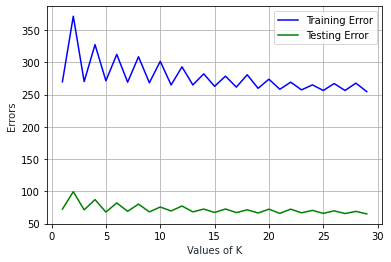

In [ ]:
K  = list(range(1,30))
[training_error_knn,testing_error_knn] = knntrainTestAnalysis(K, x_train, y_train, x_test, y_test)
plt.plot(K, training_error_knn, 'b', label = 'Training Error')
plt.plot(K, testing_error_knn, 'g', label = 'Testing Error')
plt.xlabel('Values of K', color='#1C2833')
plt.ylabel('Errors', color='#1C2833')
plt.legend(loc='upper right')
plt.grid()
plt.show()

K-Fold Cross validation for KNN on the same dataset

In [ ]:
KF = 10
k_list = list(range(1, 20))
best_k, Vm_knn, Vs_knn, Tm_knn, Ts_knn = KFoldCVkNN(x_train, y_train, KF, k_list)
print(best_k)
K = [best_k]
[training_error_knn, testing_error_knn] = knntrainTestAnalysis(K, x_train, y_train, x_test, y_test)
print('Validation Error for best K:', testing_error_knn)

19
Validation Error for best K: [66.42857143]


#Neural Network

In [39]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
x_train, y_train, x_test, y_test = train_test_split(df, 80)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
class Layer:
  def __init__(self):
    self.input = None
    self.output = None
  
  def forward_propagation(self, input):
    raise NotImplementedError
  
  def backward_propagation(self, output_error, learning_rate):
    raise NotImplementedError

Fully Connected Layer

In [41]:
class FullyConnectedLayer(Layer):
  def __init__(self, input_size, output_size):
    self.weights = np.random.rand(input_size, output_size)
    self.bias = np.random.rand(1, output_size)

  def forward_propagation(self, input_data):
    self.input = input_data
    self.output = np.dot(self.input, self.weights) + self.bias
    return self.output
  
  def backward_propagation(self, output_error, learning_rate):
    input_error = np.dot(output_error, self.weights.T)
    weights_error = np.dot(self.input.reshape(-1, 1), output_error)

    self.weights -= learning_rate * weights_error
    self.bias -= learning_rate * output_error
    return input_error

Activation Layer

In [42]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
      self.activation = activation
      self.activation_prime = activation_prime

    def forward_propagation(self, input_data):
      self.input = input_data
      self.output = self.activation(self.input)
      return self.output

    def backward_propagation(self, output_error, learning_rate):
      return self.activation_prime(self.input) * output_error

Activation Functions and Their differentials 

In [43]:
def relu(x):
  output = np.zeros(x.shape)
  for i in range(len(x)):
    for j in range(x.shape[1]):
      if(x[i][j] > 0):
        output[i][j] = x[i][j]
      else:
        output[i][j] = 0
    return output 

def relu_prime(x):
  output = np.zeros(x.shape)
  for i in range(len(x)):
    for j in range(x.shape[1]):
      if(x[i][j] > 0):
        output[i][j] = 1
      else:
        output[i][j] = 0
    return output 

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
  return np.exp(-x)/(1 + np.exp(-x))**2

Binary Cross Entropy Loss and its Derivative

In [44]:
def BCELoss(y_true, y_pred):
  return - (np.dot(y_true, np.log(y_pred).T) + np.dot(1-y_true, np.log(1-y_pred).T))/len(y_true)

def BCELoss_prime(y_true, y_pred):
  return (-y_true/(y_pred + 1e-9) + (1-y_true)/(1-y_pred + 1e-9))/len(y_true)

Network Class

In [67]:
class Network:
  def __init__(self):
    self.layers = []
    self.loss = None
    self.loss_prime = None
  
  def add_layer(self, layer):
    self.layers.append(layer)

  def use(self, loss, loss_prime):
    self.loss = loss
    self.loss_prime = loss_prime
  
  def predict(self, input_data):
    samples = len(input_data)
    result = []

    for i in range(samples):
      output = input_data[i]
      for layer in self.layers:
        output = layer.forward_propagation(output)
      result.append(output)

    return result 
  
  def fit(self, x_train, y_train, epochs, learning_rate):
    samples = len(x_train)
    errors=[]
    for i in range(epochs):
      err = 0
      for j in range(samples):
        output = x_train[j]
        for layer in self.layers:
          output = layer.forward_propagation(output)
        err += self.loss(y_train[j], output)
        error = self.loss_prime(y_train[j], output)
        for layer in reversed(self.layers):
          error = layer.backward_propagation(error, learning_rate)

      err /= samples
      if i%100 == 99:
        print('epoch %d/%d   error=%f' % (i+1, epochs, err))
      errors.append(err)
    return errors

Creating the Neural Network

In [68]:
NN = Network()
NN.add_layer(FullyConnectedLayer(8, 4))
NN.add_layer(ActivationLayer(relu, relu_prime))
NN.add_layer(FullyConnectedLayer(4, 2))
NN.add_layer(ActivationLayer(relu, relu_prime))
NN.add_layer(FullyConnectedLayer(2, 1))
NN.add_layer(ActivationLayer(sigmoid, sigmoid_prime))

NN.use(BCELoss, BCELoss_prime)

In [69]:
errors = NN.fit(x_train, y_train, epochs = 1000, learning_rate = 0.0001)

epoch 100/1000   error=0.620059
epoch 200/1000   error=0.578206
epoch 300/1000   error=0.563537
epoch 400/1000   error=0.554545
epoch 500/1000   error=0.547473
epoch 600/1000   error=0.541018
epoch 700/1000   error=0.535009
epoch 800/1000   error=0.529057
epoch 900/1000   error=0.523383
epoch 1000/1000   error=0.516698


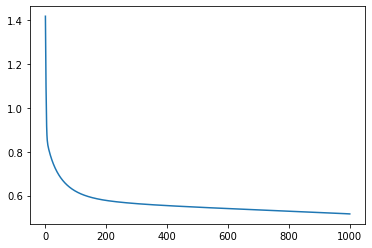

In [70]:
epochs = [i+1 for i in range(1000)]
plt.plot(epochs, errors)

# Conclusion

In [71]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [82]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
Outcome = {0: -1,1: 1}
df.Outcome = [Outcome[item] for item in df.Outcome]
df1 = df.copy()
Y = df1['Outcome'].to_numpy().reshape(-1,1)
df1 = df1.drop(columns=['Outcome'])
X = df1.to_numpy()

In [83]:
x_train, y_train, x_test, y_test = train_test_split(df, 80)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

###SVC

In [98]:
y_test_pred, w = svmPredict(x_train, y_train, x_test, 40)
y_pred = []
for i in range(len(y_test_pred)):
  if y_test_pred[i] < 0:
    y_pred.append(0)
  else:
    y_pred.append(1)
f1_svc = f1_score(y_test,y_pred, average='micro')
print(f"F1 score for Support Vector Classifier is :{f1_svc}")

F1 score for Support Vector Classifier is :0.2792207792207792


In [99]:
confusion_matrix_svc = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
accuracy = round(confusion_matrix_svc[1][1]/(confusion_matrix_svc[1][1] + confusion_matrix_svc[0][1])*100, 3)
print(f"Accuracy of the Support Vector Classifier is {accuracy} %")

<function confusion_matrix at 0x7f432a6bb200>
Accuracy of the Support Vector Classifier is 0.0 %


###KNN

In [ ]:
y_test_pred = 
f1_knn = f1_score(y_test,y_test_pred)
print(f"F1 score for the k-Nearest Neighbours Classifier is :{f1_knn}")

In [ ]:
confusion_matrix_knn = confusion_matrix(y_test,y_test_pred)
print(confusion_matrix)
accuracy = round(confusion_matrix_knn[1][1]\(confusion_matrix_knn[1][1] + confusion_matrix_knn[0][1])*100,3)
print(f"Accuracy of the k-Nearest Neighbours Classifier is {accuracy} %")

###Neural Network


In [101]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
x_train, y_train, x_test, y_test = train_test_split(df, 80)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
y_test_pred = NN.predict(x_test)
f1_nn = f1_score(y_test,y_test_pred)
print(f"F1 score for the Neural Network is :{f1_nn}")

In [ ]:
confusion_matrix_nn = confusion_matrix(y_test,y_test_pred)
print(confusion_matrix)
accuracy = round(confusion_matrix_nn[1][1]\(confusion_matrix_nn[1][1] + confusion_matrix_nn[0][1])*100,3)
print(f"Accuracy of the Neural Network is {accuracy} %")

We can clearly see that the #insert_model_name# is the most accurate model for this dataset, with an accuracy of #insert_accuracy# and an F1 score of #insert_f1_score#. 